In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics


In [2]:
df=pd.read_csv("riceClassification.csv", index_col=0)

# <center>Clasificación de tipos de arroz dependiendo su forma.</center>  

Todos los arroces son la semilla de una misma planta, la Oryza Sativa. Sin embargo, no todos los tipos de arroz tienen la misma  forma y aroma , esto influye en la manera que se debe cocinar.


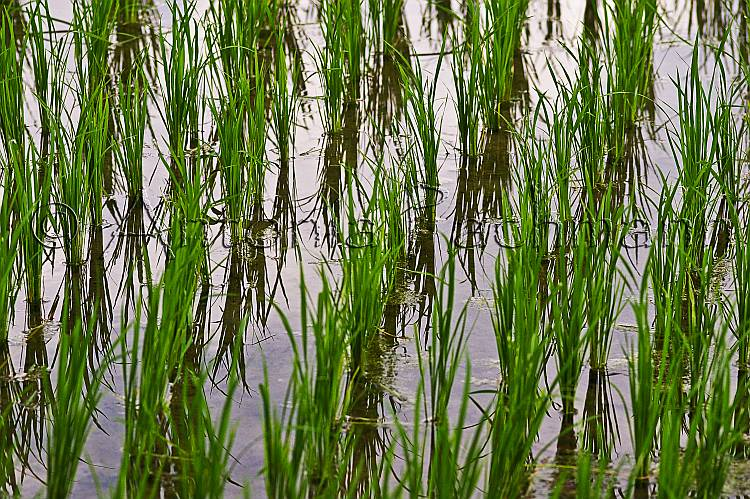 




## <center>Tipos de arroz.</center>  

El arroz se puede clasificar ya se se por su tamño, aroma , textura y procesado, para este proyecto usaremos un dataset que me entrega diferentes medidas del arroz (tomando este como na elipse) por ende se realizar un entrenamiento no supervisado k-means para clasificar el arroz dependiendo su forma.

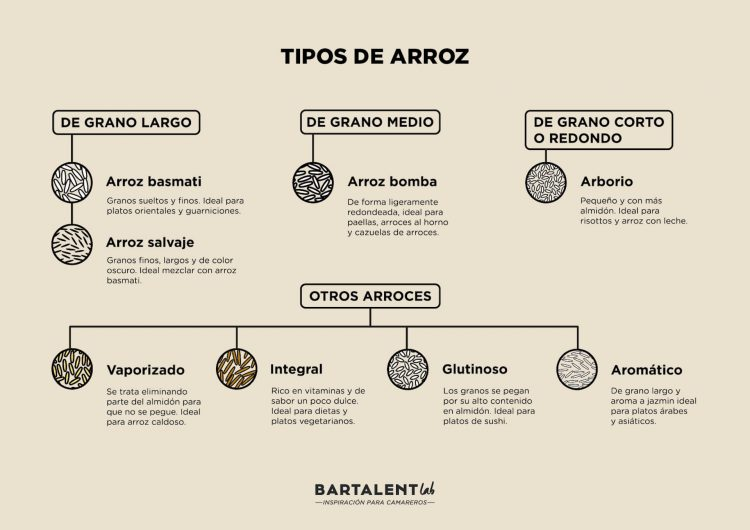

In [3]:
df.head()

,MajorAxisLength,MinorAxisLength,Roundness,AspectRation
id,,,,
1,92.229316,64.012769,0.764510,1.440796
2,74.691881,51.400454,0.831658,1.453137
3,76.293164,52.043491,0.868434,1.465950
4,77.033628,51.928487,0.870203,1.483456
5,85.124785,56.374021,0.874743,1.510000


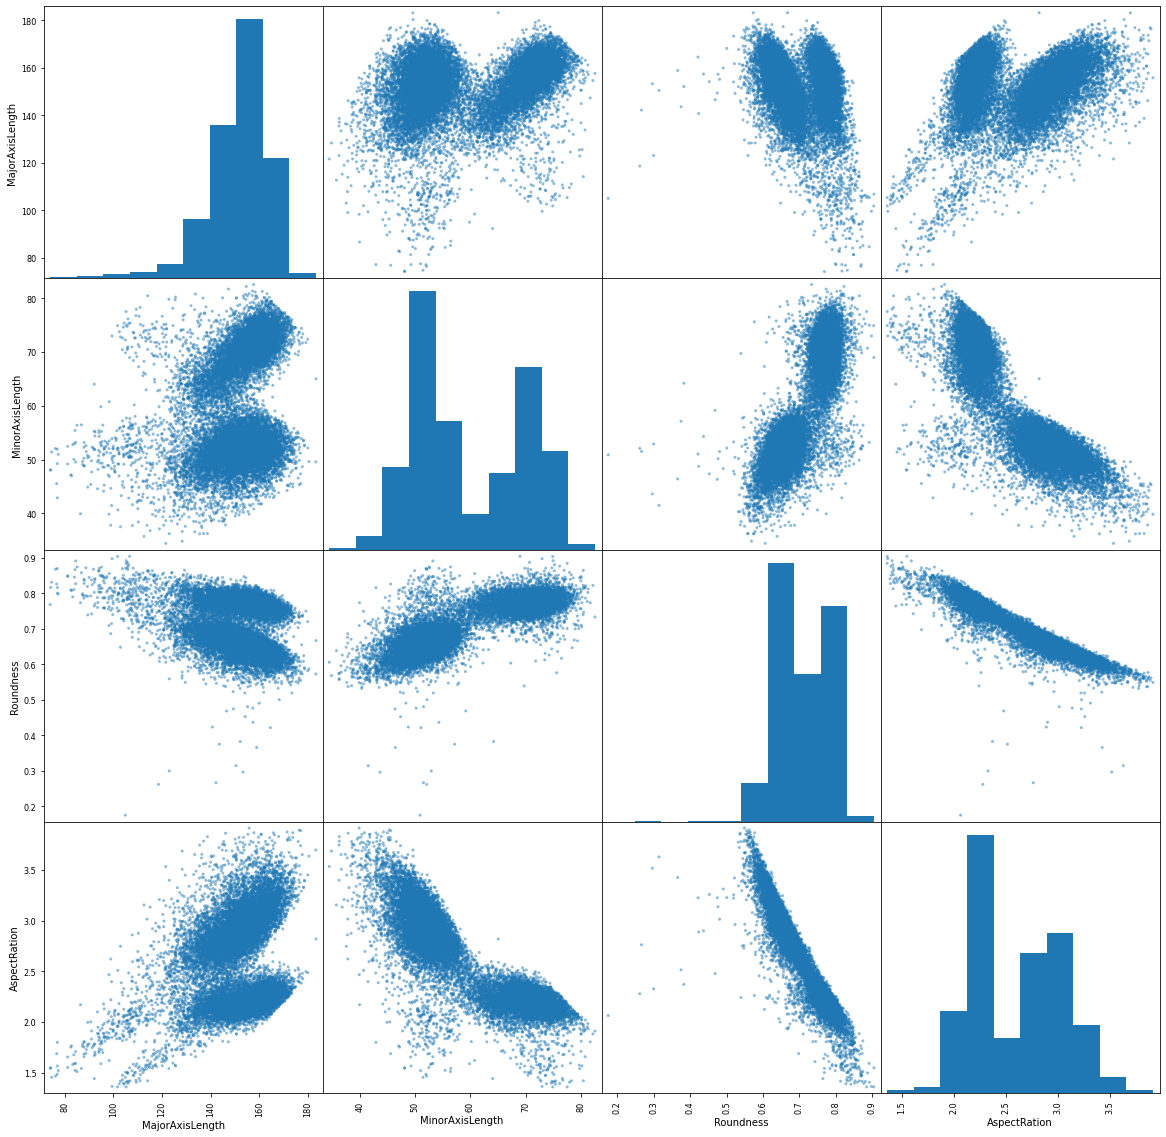

In [4]:
pd.plotting.scatter_matrix(df, cmap="Set1",figsize=(20,20));

 una de las caracteristicas principales que definen el tipo de arroz es la dimesion de sus ejes tanto menor como mayor, por eso es interesante tener esta grafica como punto de analis para determinar si el algoritmo realiza correctamete la clasificacion

Text(0, 0.5, 'MinorAxisLength')

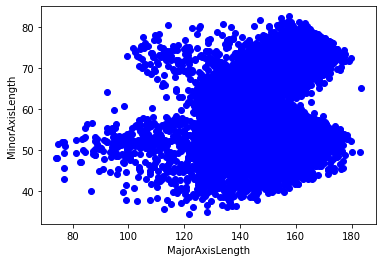

In [5]:
plt.scatter(df["MajorAxisLength"],df["MinorAxisLength"], color="blue")
plt.xlabel("MajorAxisLength", fontsize=10)
plt.ylabel("MinorAxisLength", fontsize=10)

## K-Means

Antes de aplicar k-means, se aplicara el metodo del codo para determinar que numero de Clusters es el mas indicado.

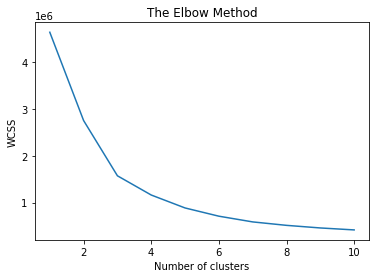

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Se puede observar que la cantidad de clusters necesarios es de 3

In [7]:
clasificador = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = clasificador.fit_predict(df)

Text(0, 0.5, 'MinorAxisLength')

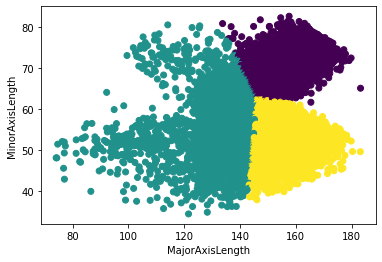

In [8]:
plt.scatter(df["MajorAxisLength"],df["MinorAxisLength"], c=y_kmeans)
plt.xlabel("MajorAxisLength", fontsize=10)
plt.ylabel("MinorAxisLength", fontsize=10)

Se observa la clasificacion del arroz dependiendo de la relacion entre sus ejes, lo cual define su redondes, sabiendo que entre mas redonde este mas pequeño es el grano.

Se observa que los puntos azules definen el grano corto, ya que su relacion entre los ejes hace que este tienda ha ser mas redonde, algo interesante es la clasificación de los granos medianos y largos que estos se diferencia exclusivamente del tamaño de su eje menor, es decir que estos tienen el mismo rango en el eje mayor pero se puede difenciar uno del otro debido a su eje menor, en este caso los puntos morados serian los granos medianos y los puntos amarillo los granos largos.

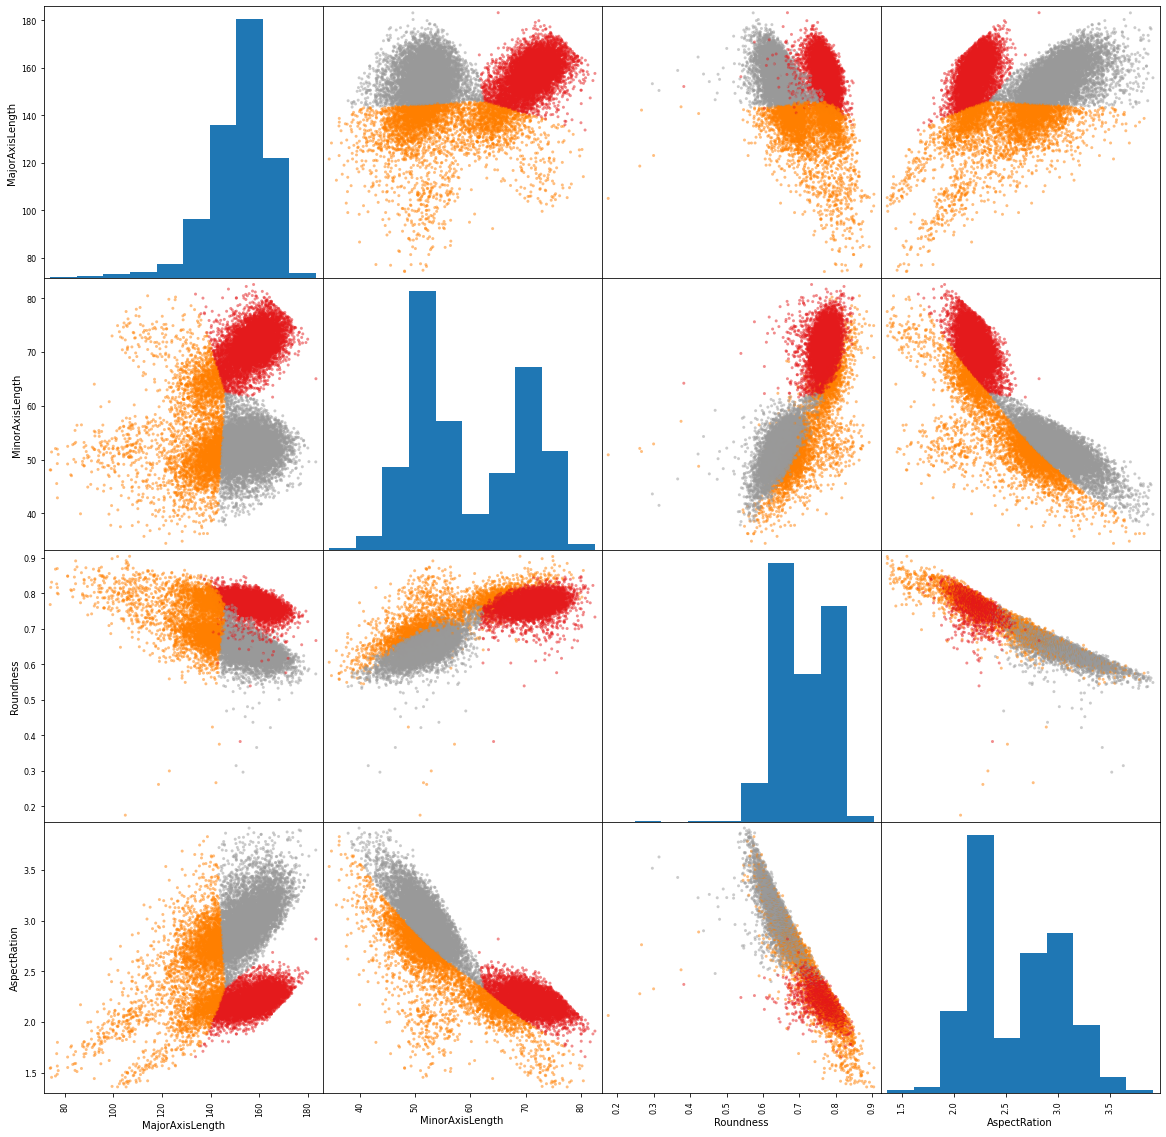

In [9]:
pd.plotting.scatter_matrix(df, c=y_kmeans, cmap="Set1",figsize=(20,20));